In [1]:
import sys

sys.path.append("../")

In [2]:
from pathlib import Path

import numpy as np  # type: ignore
from audio_score_alignment import AudioScoreAlignment
from dtw_utils import (
    get_csv_onsets,
    get_audio_ids,
    get_audio_jams_onsets,
    map_timing,
    _get_jams_onsets,
)

In [3]:
# define constants
FEATURE_RATE = 10

In [4]:
# define paths
audio_path = Path("/media/data/andrea/choco_audio/audio")
score_path = Path("./data/schubert-winterreise/csv-score")
jams_score_path = Path("./data/schubert-winterreise/jams-score")
jams_audio_path = Path("/media/data/andrea/choco_audio/jams")

audio_path.exists(), score_path.exists()

(True, True)

In [5]:
# get the list of score files
score_files = list(score_path.glob("*.csv"))
# get an example score file
score_file = score_files[0]

score_file.stem

'schubert-winterreise-score_22'

In [6]:
# get all audios for the example score file
audio_ids = get_audio_ids(score_file.stem, "./data/schubert-winterreise/")

audio_ids

['schubert-winterreise-audio_22',
 'schubert-winterreise-audio_46',
 'schubert-winterreise-audio_70',
 'schubert-winterreise-audio_94',
 'schubert-winterreise-audio_118',
 'schubert-winterreise-audio_142',
 'schubert-winterreise-audio_166',
 'schubert-winterreise-audio_190',
 'schubert-winterreise-audio_214']

In [7]:
audio_stem = audio_ids[3]
audio_file = audio_path / f"{audio_stem}.flac"

audio_file

PosixPath('/media/data/andrea/choco_audio/audio/schubert-winterreise-audio_94.flac')

In [8]:
import librosa  # type: ignore

# load the audio file
y, sr = librosa.load(audio_file, sr=None)
# get the duration of the audio file
duration = librosa.get_duration(y=y, sr=sr)
duration, sr

(175.47319727891156, 44100)

In [9]:
score_onsets = _get_jams_onsets(jams_score_path / f"{score_file.stem}.jams")
len(score_onsets)

69

## Test with one file


schubert-winterreise-audio_22


Generating filterbank...
Downsampling signal...
Processing midi pitches 21 to 108
.........30.........40.........50.........60.........70.........80.........90.........100........


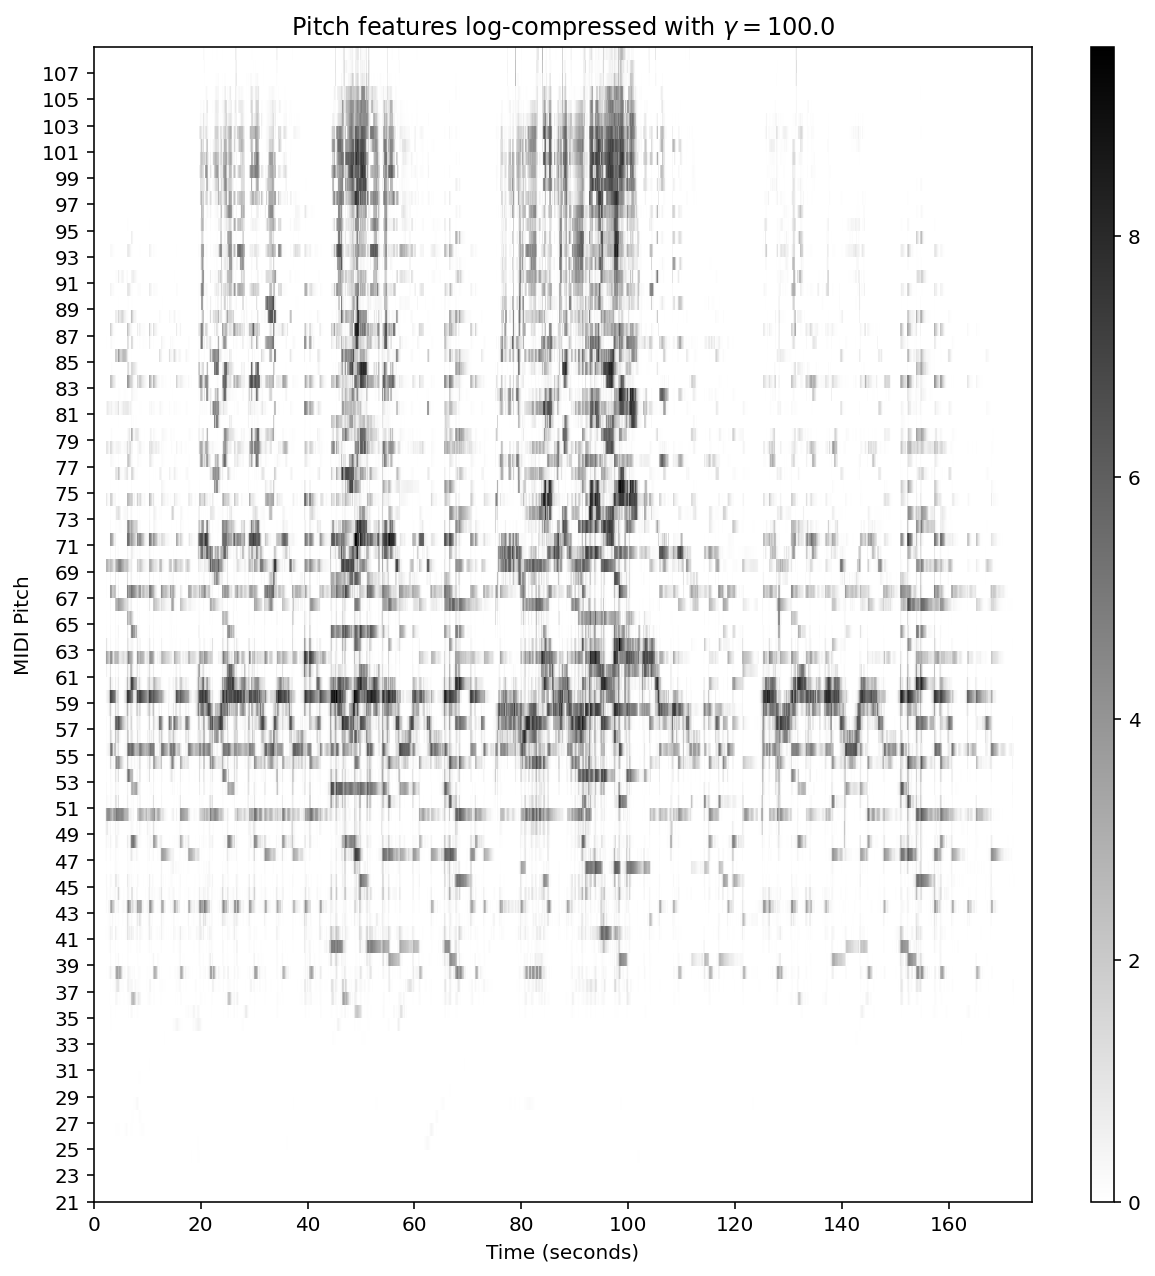

Generating filterbank...
Downsampling signal...
Processing midi pitches 21 to 108
.........30.........40.........50.........60.........70.........80.........90.........100........


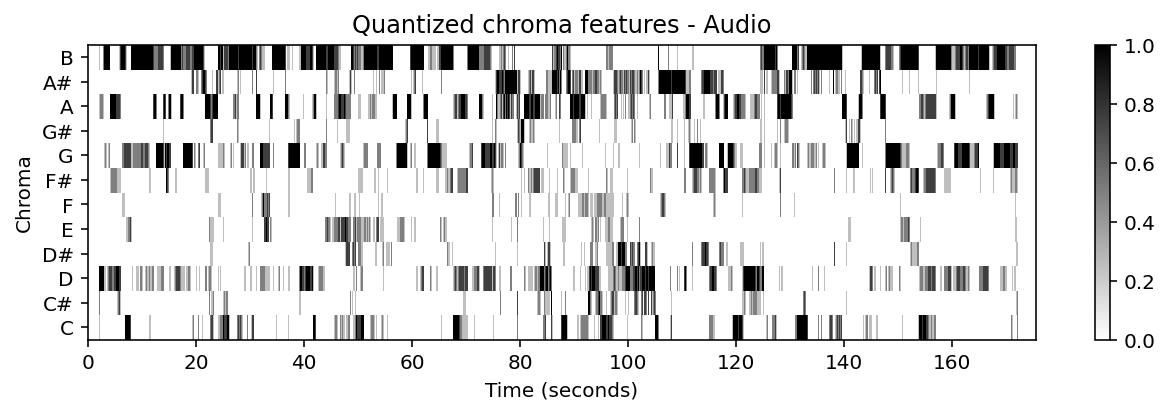

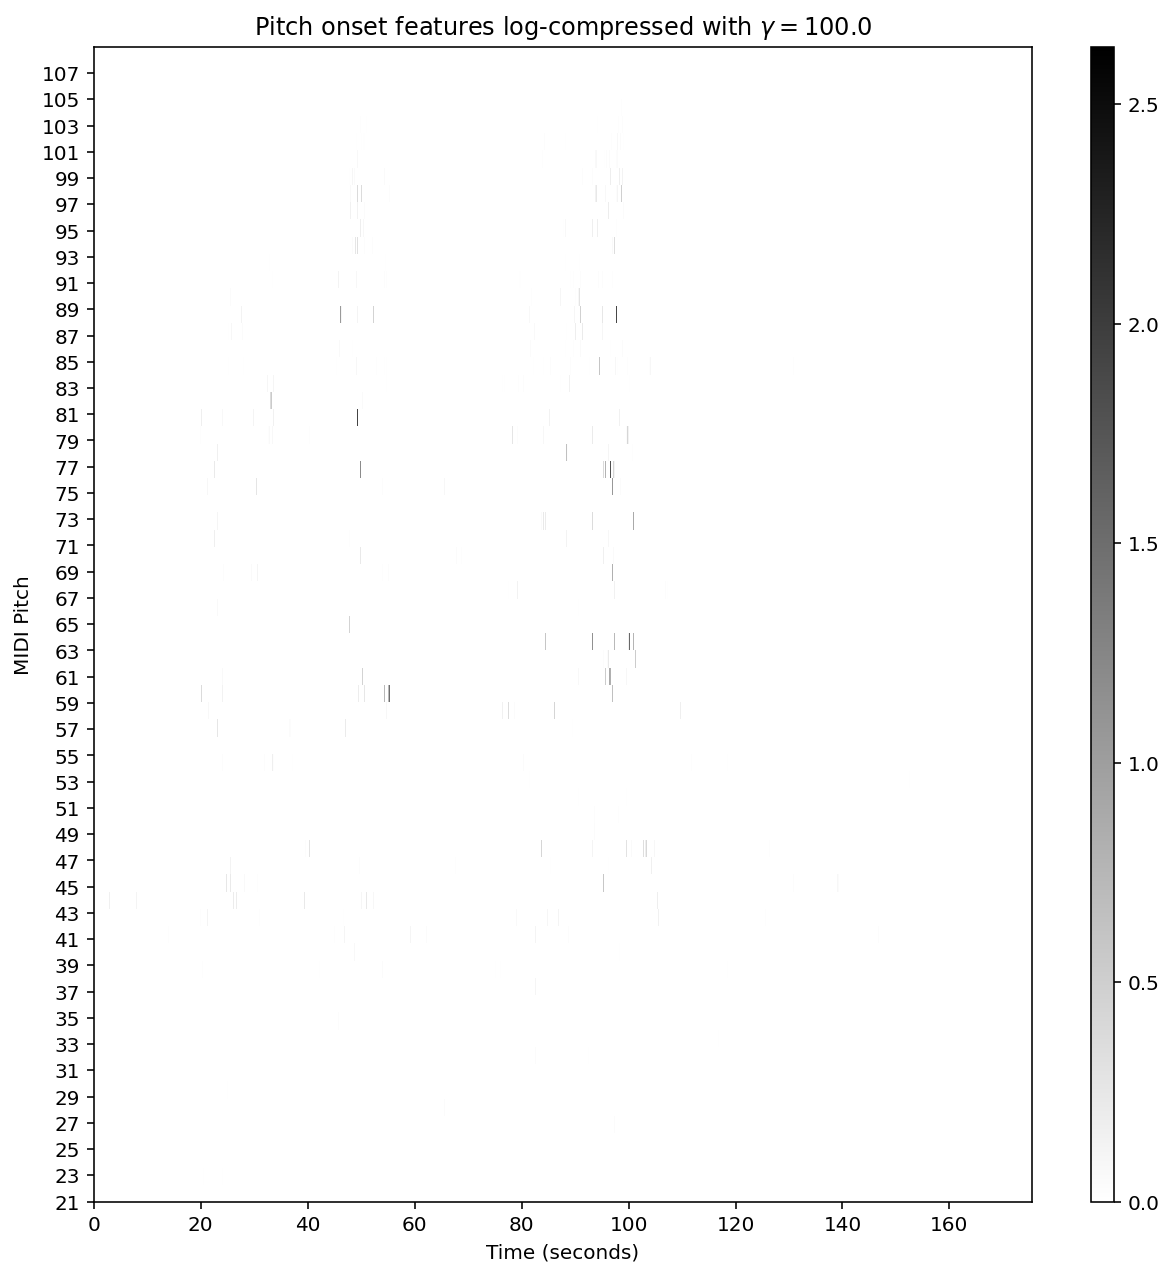

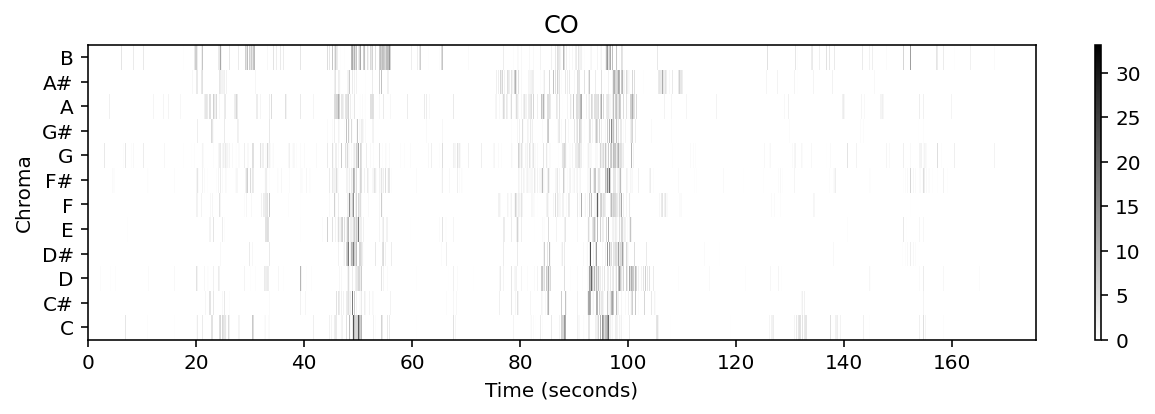

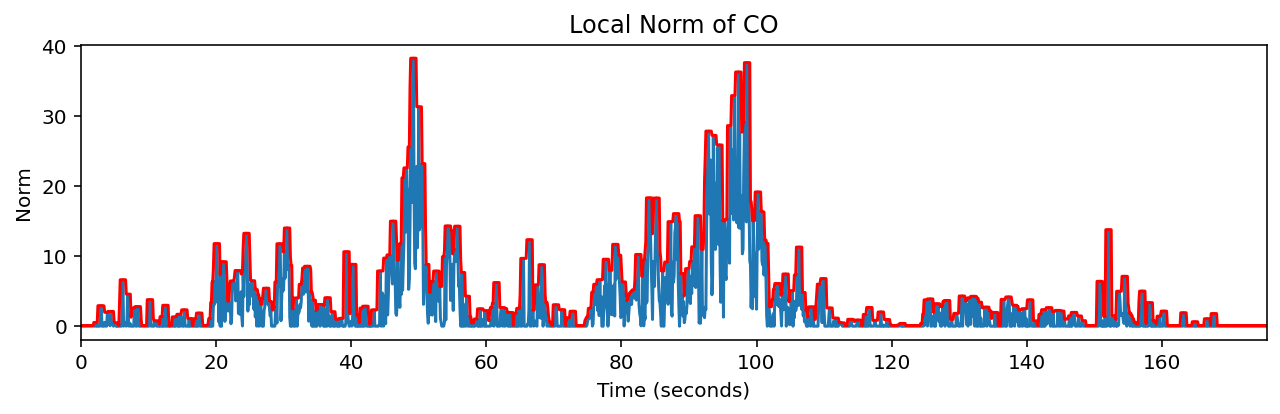

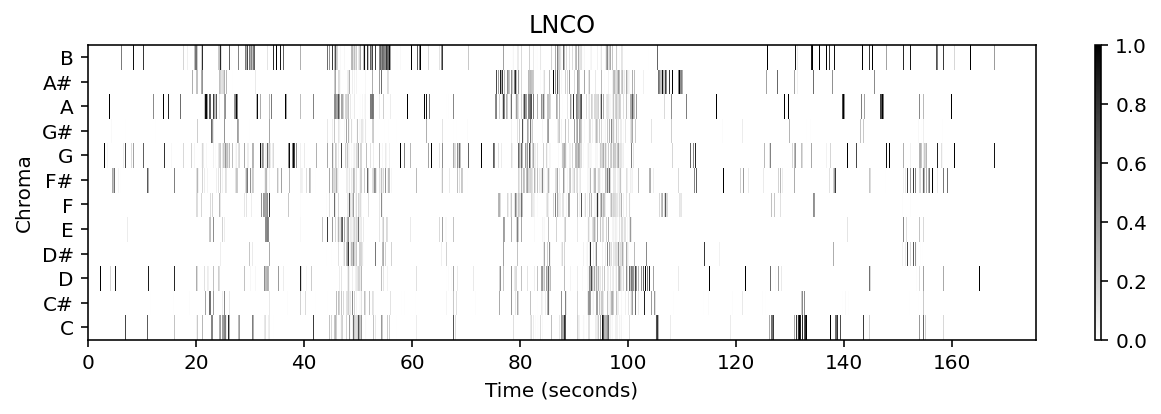

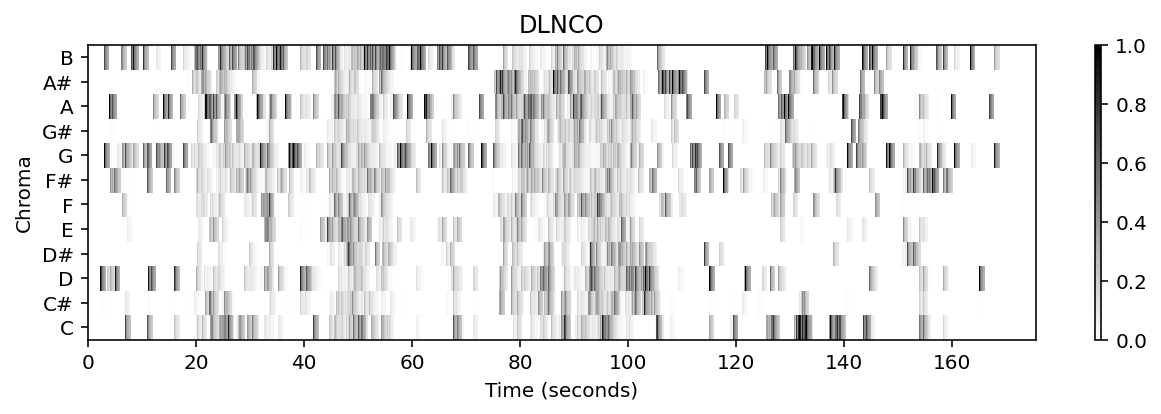

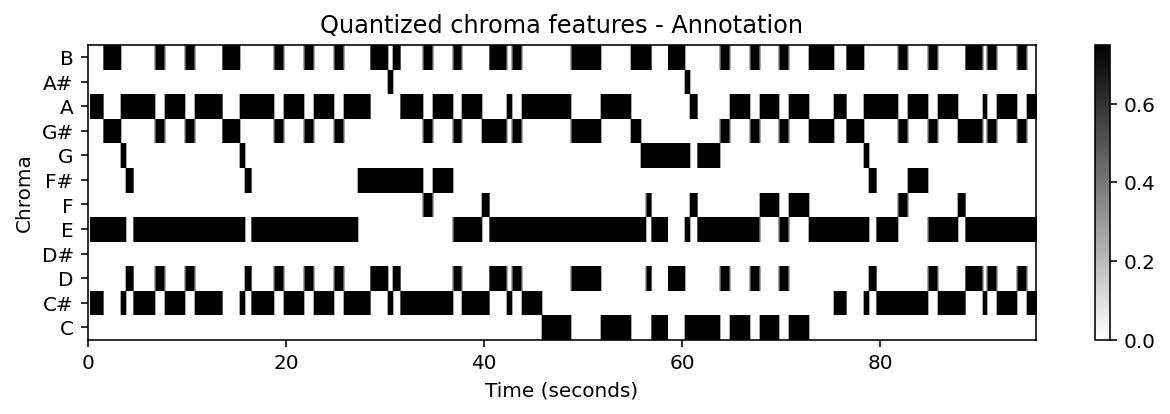

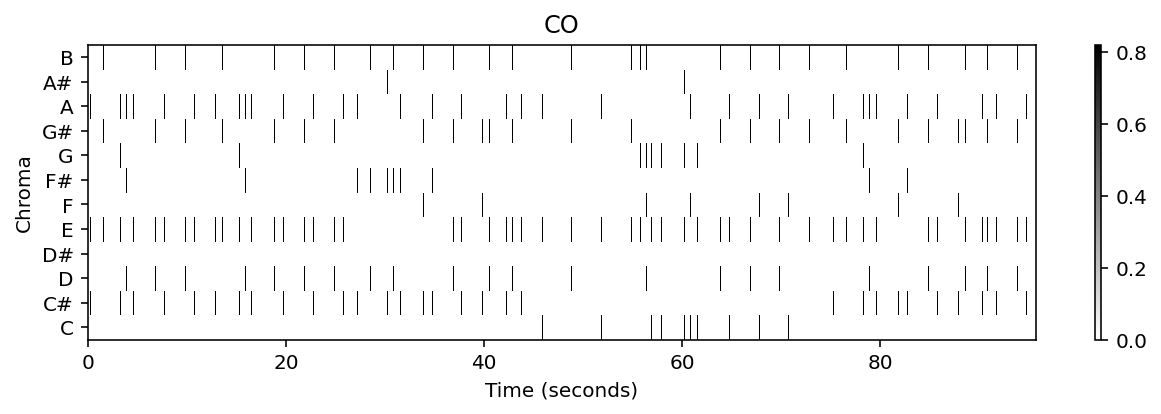

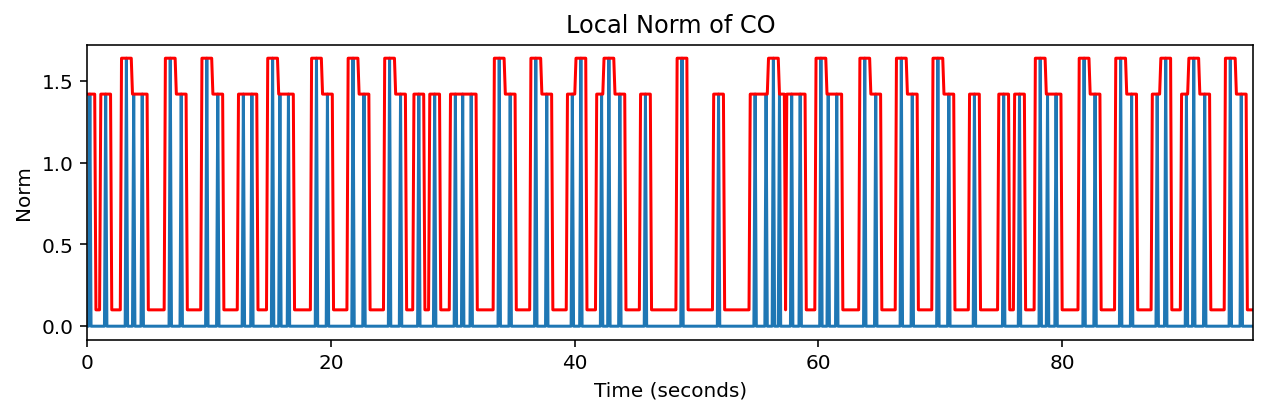

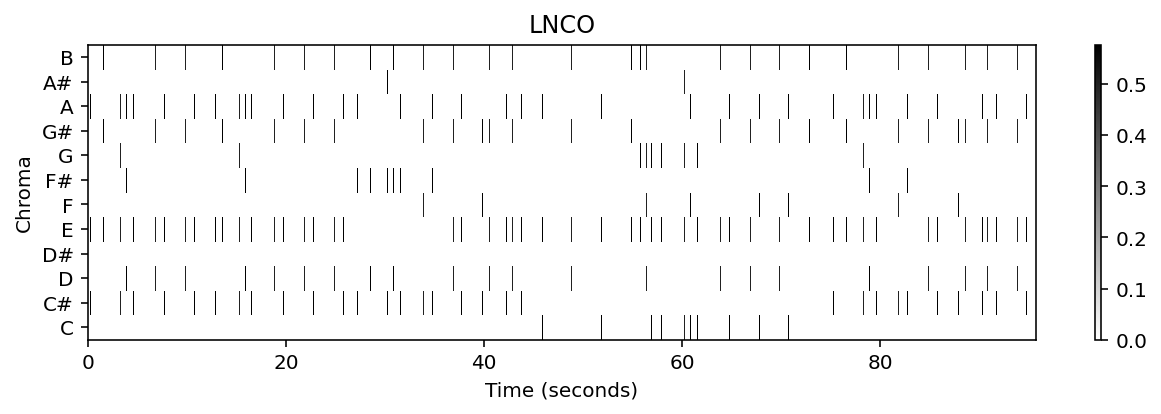

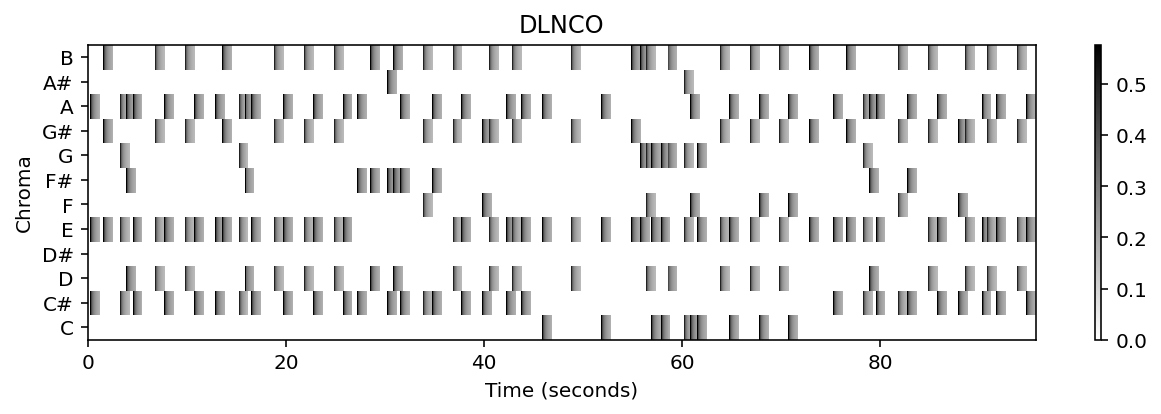

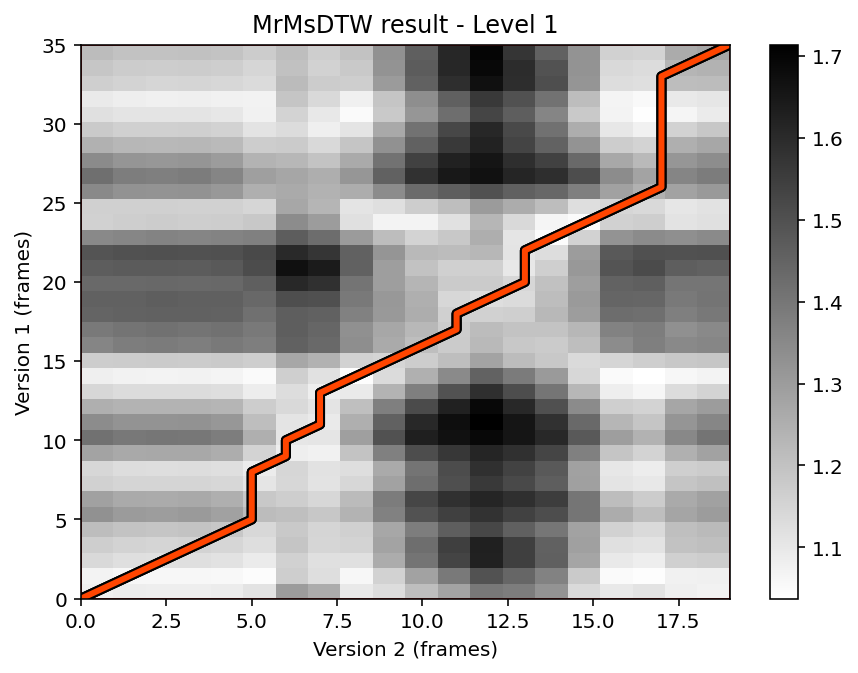

Level 0 computation time: 0.01 seconds


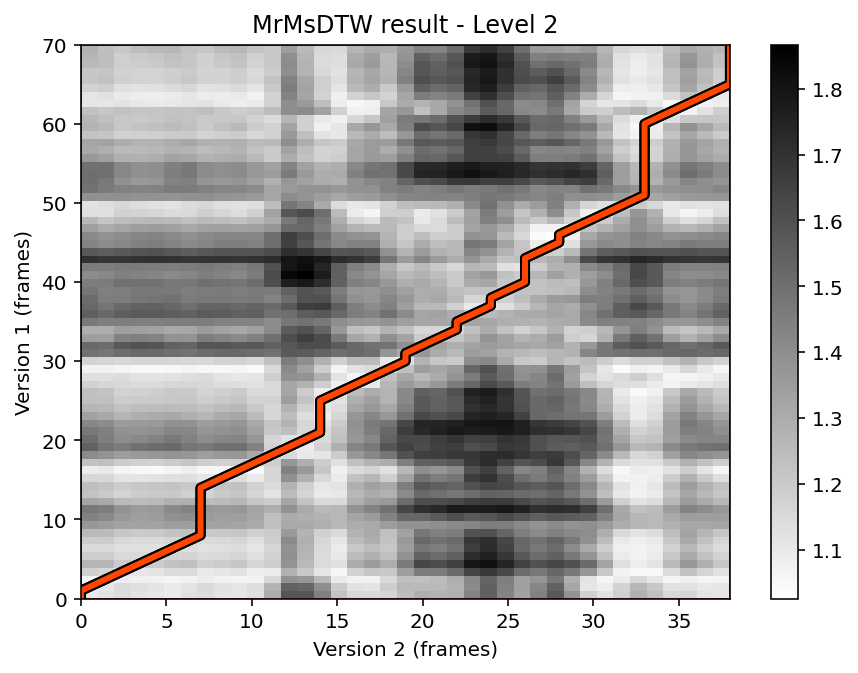

Level 1 computation time: 0.09 seconds


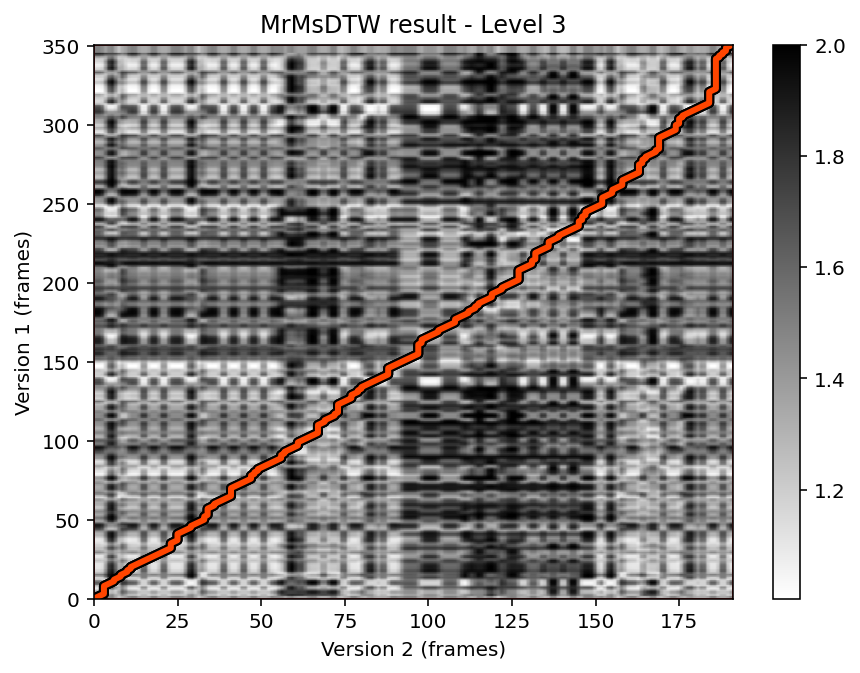

Level 2 computation time: 0.00 seconds


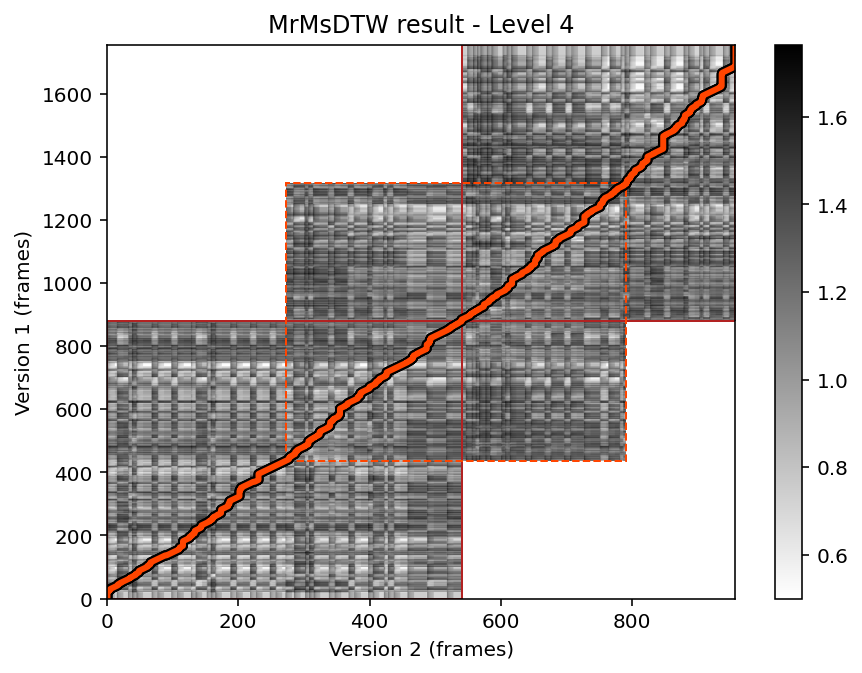

Level 3 computation time: 0.29 seconds
Computation time of MrMsDTW: 0.39 seconds


array([[0.000e+00, 1.000e+00, 2.000e+00, ..., 1.753e+03, 1.754e+03,
        1.755e+03],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 9.570e+02, 9.570e+02,
        9.570e+02]])

In [10]:
for audio_id in audio_ids[:1]:
    print(audio_id)

    # create the audio score alignment object
    alignment = AudioScoreAlignment(
        audio_path=audio_file, score_path=score_file, feature_rate=FEATURE_RATE
    )
    alignment = alignment.get_alignment(visualize=True)

alignment

In [11]:
for i in range(len(alignment[0])):  # type: ignore
    print(alignment[0][i], alignment[1][i])  # type: ignore

0.0 0.0
1.0 1.0
2.0 1.0
3.0 1.0
4.0 1.0
5.0 1.0
6.0 1.0
7.0 1.0
8.0 1.0
9.0 1.0
10.0 1.0
11.0 1.0
12.0 1.0
13.0 1.0
14.0 1.0
15.0 1.0
16.0 1.0
17.0 1.0
18.0 1.0
19.0 1.0
20.0 1.0
21.0 1.0
22.0 1.0
23.0 2.0
24.0 3.0
25.0 4.0
26.0 4.0
27.0 4.0
28.0 5.0
29.0 5.0
30.0 5.0
31.0 6.0
32.0 7.0
33.0 8.0
34.0 9.0
35.0 10.0
36.0 11.0
37.0 12.0
38.0 13.0
39.0 14.0
40.0 15.0
41.0 16.0
42.0 17.0
43.0 17.0
44.0 17.0
45.0 17.0
46.0 18.0
47.0 19.0
48.0 20.0
49.0 21.0
50.0 21.0
51.0 22.0
52.0 23.0
53.0 24.0
54.0 25.0
55.0 26.0
56.0 27.0
57.0 28.0
58.0 29.0
59.0 30.0
60.0 31.0
61.0 32.0
62.0 33.0
63.0 34.0
64.0 35.0
65.0 35.0
66.0 36.0
67.0 37.0
68.0 37.0
69.0 38.0
70.0 39.0
71.0 40.0
72.0 41.0
73.0 42.0
74.0 43.0
75.0 44.0
76.0 44.0
77.0 44.0
78.0 44.0
79.0 45.0
80.0 46.0
81.0 47.0
82.0 48.0
83.0 49.0
84.0 49.0
85.0 49.0
86.0 49.0
87.0 49.0
88.0 49.0
89.0 50.0
90.0 51.0
91.0 52.0
92.0 53.0
93.0 54.0
94.0 55.0
95.0 56.0
96.0 57.0
97.0 58.0
98.0 59.0
99.0 60.0
100.0 61.0
101.0 62.0
102.0 62.0
103.0 62.0
1

In [12]:
audio_indices = alignment[0]  # type: ignore
score_indices = alignment[1]  # type: ignore

# get jams_score onsets which are the value in the 'Start' column of a csv
score_onsets = get_csv_onsets(score_file)

for onset in score_onsets:
    onset = float(onset) * FEATURE_RATE
    print(onset / FEATURE_RATE)
    # find value in score_indices that is closest to onset
    idx = np.abs(score_indices - onset).argmin()
    print(idx, score_indices[idx], audio_indices[idx] / FEATURE_RATE)

0.24899999999999997
23 2.0 2.3
1.5090000000000001
40 15.0 4.0
3.249000000000001
61 32.0 6.1
3.7590000000000003
69 38.0 6.9
4.509
79 45.0 7.9
6.759
116 68.0 11.6
7.7490000000000006
125 77.0 12.5
9.759
146 98.0 14.4
10.749
155 107.0 15.3
12.759
200 128.0 19.8
13.509
218 135.0 21.6
15.249
242 152.0 24.0
15.759
250 158.0 24.8
16.509
263 165.0 26.1
18.759
312 188.0 31.0
19.749000000000002
321 197.0 31.9
21.759
367 218.0 36.5
22.749000000000002
376 227.0 37.2
24.759
416 248.0 41.2
25.749000000000002
425 257.0 42.1
27.249000000000002
440 272.0 43.6
28.509000000000004
460 285.0 45.6
30.249000000000002
488 302.0 48.4
30.759000000000004
504 308.0 50.0
31.509000000000004
513 315.0 50.9
33.759
548 338.0 54.4
34.749
575 347.0 57.1
36.759
624 368.0 62.0
37.749
633 377.0 62.9
39.759
668 398.0 66.4
40.509
680 405.0 67.6
42.249
707 422.0 70.3
42.759
723 428.0 71.9
43.749
732 437.0 72.8
45.759
754 458.0 75.0
48.759
810 488.0 80.6
51.759
854 518.0 85.0
54.759
896 548.0 89.2
55.749
909 557.0 90.5
56.259
9

In [13]:
# get jams_score onsets which are the value in the 'Start' column of a csv
score_onsets = get_csv_onsets(score_file)

converted_onsets = [
    map_timing(alignment, float(onset) * FEATURE_RATE)  # type: ignore
    for onset in score_onsets
]
converted_onsets = np.array(converted_onsets)

converted_onsets = converted_onsets / FEATURE_RATE

score_onsets, converted_onsets

(array(['0.24899999999999997', '1.5090000000000001', '3.2490000000000006',
        '3.7590000000000003', '4.509', '6.759', '7.7490000000000006',
        '9.759', '10.749', '12.759', '13.509', '15.249', '15.759',
        '16.509', '18.759', '19.749000000000002', '21.759',
        '22.749000000000002', '24.759', '25.749000000000002',
        '27.249000000000002', '28.509', '30.249000000000002', '30.759',
        '31.509', '33.759', '34.749', '36.759', '37.749', '39.759',
        '40.509', '42.249', '42.759', '43.749', '45.759', '48.759',
        '51.759', '54.759', '55.748999999999995', '56.259',
        '56.769000000000005', '57.759', '58.509', '60.248999999999995',
        '60.759', '61.509', '63.759', '64.749', '66.759', '67.749',
        '69.759', '70.749', '72.759', '75.249', '76.509', '78.249',
        '78.759', '79.509', '81.759', '82.749', '84.759', '85.749',
        '87.759', '88.509', '90.249', '90.759', '91.749', '93.759',
        '94.749'], dtype=object),
 array([  2.3,   4. 

## Evaluation


In [14]:
# get the corresponding audio onsets
audio_onsets = get_audio_jams_onsets(audio_file.stem, jams_audio_path)

len(audio_onsets)

69

In [15]:
for i in range(len(audio_onsets)):
    print(audio_onsets[i], converted_onsets[i])

1.82 2.3
3.9 4.0
6.06 6.1
6.84 6.9
7.9 7.9
11.04 11.6
12.34 12.5
16.08 14.4
17.48 15.3
20.52 19.8
21.56 21.6
23.98 24.0
25.0 24.8
26.04 26.1
30.02 31.0
31.84 31.9
35.14 36.5
37.06 37.2
40.26 41.2
42.1 42.1
44.28 43.6
46.34 45.6
48.58 48.4
49.7 50.0
50.92 50.9
55.14 54.4
57.04 57.1
60.62 62.0
62.9 62.9
66.34 66.4
67.58 67.6
70.3 70.3
71.2 71.9
72.78 72.8
75.9 75.0
80.52 80.6
84.72 85.0
89.18 89.2
90.56 90.5
91.18 91.2
91.9 91.9
93.58 93.6
94.74 94.8
97.22 97.2
98.06 98.1
99.28 99.5
103.68 103.8
105.48 105.5
109.0 110.5
111.34 111.4
115.18 115.0
116.68 116.7
121.18 121.2
125.18 125.0
127.6 127.6
130.32 130.3
131.44 131.1
132.96 133.0
137.88 138.1
140.44 140.4
144.62 146.6
147.6 147.6
152.1 151.6
153.7 153.7
157.0 157.0
158.16 159.4
160.3 160.3
164.82 166.7
167.64 167.6


In [16]:
# get mireval alignment metrics betweeb the two onsets
from curses import window
from mir_eval import alignment

alignment = alignment.evaluate(audio_onsets, converted_onsets, window=0.3)
alignment

OrderedDict([('pc', 0.7101449275362319),
             ('mae', 0.060000000000002274),
             ('aae', 0.35942028985507163),
             ('pcs', 0.8551441321915333),
             ('perceptual', 0.6288164017200519)])